Nama Kelompok: 
1. M. Rafy Shah Pahlevi (2141720244/19)
2. Serli Putri Maharani (2141720023/26)

# **TUGAS**

> * Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
* Anda diperbolehkan melakukan eksplorasi terhadap,
Metode pra pengolahan
Pemilihan fitur
Arsitektur ANN
Fungsi Aktiviasi
*ANN diimplementasikan dengan menggunakan tensorflow.


**Import Library**

In [1]:
import numpy as np # import library numpy yg digunakan untuk manipulasi array dan operasi matematika
import matplotlib.pyplot as plt # import library matplotlib untuk membuat grafik dan visualisasi data
import pandas as pd # import library panda untuk manipulasi dan analisis data dalam bentuk dataframe

# import tensorflow dan keras untuk pembangunan dan pelatihan model jaringan staf tiruan
import tensorflow 
import keras

from tensorflow.keras.models import Sequential # import modul sequential untuk membangun model secara berurutan satu lapisan setelah lapisan yang lain
from keras.layers import Dense, Dropout # import dense untuk menambah lapisan terhubung penuh kedalam model dan dropout untuk mencegah overfitting 
from keras import regularizers # untuk menerapkan regulasi pada lapisam jaringan saraf

import warnings
warnings.filterwarnings('ignore') # import modul peringatam dan mengatur agar peringatan agar tidak ditampilkan
#cuda 12.1 not recognized by tf :(
%matplotlib inline
# print(tensorflow.__version__)

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Menyiapkkan Dataset MNIST**

In [2]:
# untuk memuat dataset MINIST menggunakan pustaka keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

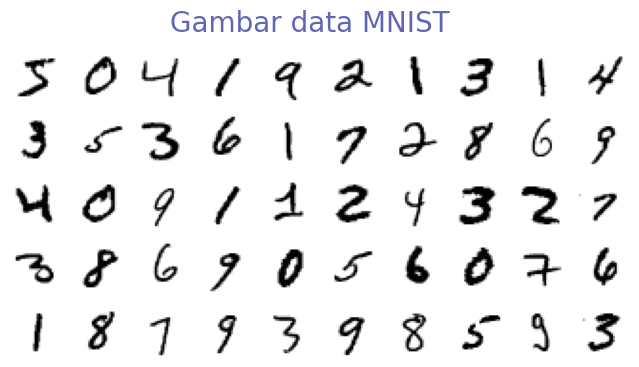

In [3]:
fig, ax = plt.subplots(nrows = 5, ncols = 10, figsize=(8,4), subplot_kw={'xticks': [], 'yticks': []}) # membuat sebuah gambar 
for row in range(0,5): # mengatur baris
    for col in range(0,10): # mengatur kolom
        myid = (10*row) + col # menghitung indeks gambar yang akan ditampilkan

        ax[row,col].imshow( x_train[myid], cmap=plt.cm.binary ) # menampilkan gambar pada subplot yang sesuai 
        ax[row,col].axis('off') # menghilangkan sumbu axis (x dan y) pada setiap subplot
 
plt.suptitle("Gambar data MNIST", size=20, color="#6166B3") # menambahkan judul 

plt.show() # menampilkan gambar 

**Mencetak Informasi Dataset MNIST**

In [4]:
print("bentuk data: ",x_train.shape) # mencetak bentuk dari data pelatihan
print("nilai max data: ",x_train[0].max()) # mencetak nilai maksimum dalam gambar pertama

bentuk data:  (60000, 28, 28)
nilai max data:  255


**Reshape dan Normalisasi data**

In [5]:
x_train = x_train.reshape(-1, 28*28) # mengubah bentuk data pelatihan dari bentuk awal yang awalnya berisi gambar 2D menjadi bentuk baru berupa 2D dengan satu baris per gambar
x_train = x_train.astype('float32') / 255 #  mengubah tipe data menjadi float

# mengulangi untuk data pengujian 
x_test = x_test.reshape(-1, 28*28) 
x_test = x_test.astype('float32') / 255

print("bentuk data setelah: ",x_train.shape) # mencetak bentuk data pelatihan setelah transformasi
print("nilai max data setelah: ",x_train[0].max()) # mencetak nilai maksimum dalam gambar pertama dari data pelatihan setelah transformasi

bentuk data setelah:  (60000, 784)
nilai max data setelah:  1.0


**Pemodelan ANN**


In [6]:
# ubah bentuk label menjadi kategorical untuk digunakan tensorflow nantinya
y_train = tensorflow.keras.utils.to_categorical(y_train , num_classes=10) # mengubah target pelatihan menjadi representasi one-hot encoding menggunakan fungsi dari pustaka tensorflow
y_test = tensorflow.keras.utils.to_categorical(y_test , num_classes=10) # mengubah target pengujian menjadi representasi one-hot encoding dengan menggunakan fungsi dan menjadikan num_classes menjadi 10

**pembuatan hidden layer**

In [7]:
# menimpor berbagai kelas layer dan model yang diperlukan dari pustaka tensorflow untuk membangun model jaringan saraf tiruan
from tensorflow.keras.layers import MaxPooling2D,Conv2D,Input,Add,MaxPool2D,Flatten,AveragePooling2D,Dense,BatchNormalization,ZeroPadding2D,Activation,Concatenate,UpSampling2D
from tensorflow.keras.models import Model

nn_model = Sequential() # membuat objek model sequential untuk membangun model secara berurutan dengan menambahkan lapisan satu per satu
nn_model.add(Dense(35, input_dim=784, activation='relu')) # menambahkan lapisan dense yang terdiri dari neuron yang terhubung sepenuhnya
nn_model.add(Dropout(0.3)) # menambahkan lapisan dropout ke model untuk mencegah overfitting dengan secara acak mematikan sebagian unit neuron selama pelatihan
nn_model.add(Dense(10, activation='softmax')) # menambahkan lapisan kedua ke model. aktivasi softmax untuk menghasilkan probabilitas distribusi kelas
print(nn_model) # mencetak tentang informasi tentang mmodel yang telah dibangun

In [8]:
# loss='categorical_crossentropy' : mengatur fungsi loss yang akan digunakan
# optimizer='adam' : mengatur algoritma optimasi yang digunakan untuk memperbarui bobot model selama pelatihan
# metrics=['accuracy'] : mengatur metrik evaluasi

nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Pelatihan dan Pengujian Dataset**

In [9]:
history = nn_model.fit(x_train, y_train, epochs=10) # x_train melatih model, y_train target pelatihan, dan epochs=10 menentukan jumlah iterasi

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5054 - accuracy: 0.8488
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3071 - accuracy: 0.9082
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2654 - accuracy: 0.9206
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2499 - accuracy: 0.9231
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2356 - accuracy: 0.9276
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2247 - accuracy: 0.9313
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2187 - accuracy: 0.9322
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2107 - accuracy: 0.9338
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2016 - accuracy: 0.9371
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.202

**Hasil Visualisasi Evaluasi**

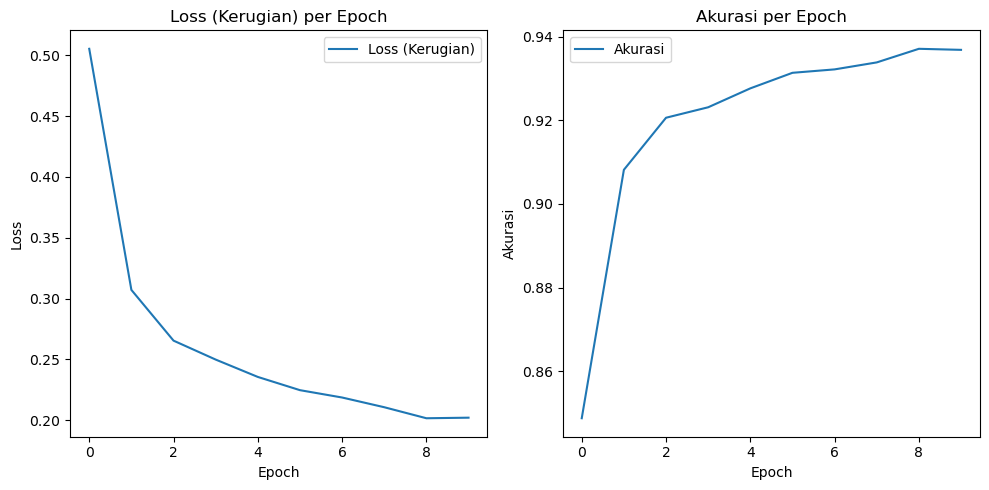

In [10]:
# Visualisasi loss (kerugian)
plt.figure(figsize=(10, 5)) # membuat suatu figur 
plt.subplot(1, 2, 1) # membuat subplot pertama
plt.plot(history.history['loss'], label='Loss (Kerugian)') # menggambar plot loss(kerugian) dari history
plt.title('Loss (Kerugian) per Epoch') # memberikan judul pada subplot pertama
plt.xlabel('Epoch') # memberikan label sumbu x pada subplot pertama
plt.ylabel('Loss') # memberikan label sumbu y pada subplot pertama
plt.legend() # menampilkan legenda ada sub plot pertama

# Visualisasi akurasi
plt.subplot(1, 2, 2) # membuat subplot kedua
plt.plot(history.history['accuracy'], label='Akurasi') # menggambar plot akurasi dari history
plt.title('Akurasi per Epoch') # memberikan judul pada subplot kedua 
plt.xlabel('Epoch') # memberikan label sumbu x pada subplot kedua
plt.ylabel('Akurasi') # memberikan label sumbu y pada subplot kedua
plt.legend() # menampilkan legenda pada subplot kedua

plt.tight_layout() # mengatur tata letak subplot
plt.show() # menampilkan figur dengan plot yang telah digambar


**Confusion Matrix**

In [11]:
# Menghitung akurasi model pada data pengujian menggunakan prediksi yang dihasilkan sebelumnya
y_prob = nn_model.predict(x_test) # untuk melatih prediksi pada data pengujian
y_pred = y_prob.argmax(axis=1) # mengambil indeks dengan nilai probabilitas tertinggi
y_test = np.argmax(y_test, axis=1) # mengubah format data target pengujian menjadi bentuk indeks dengan menggunakan metode argmax
from sklearn.metrics import accuracy_score # menggunakan metrik accuracy_score untuk menghitung akurasi prediksi
accuracy_score(y_test,y_pred) # membandingkan array y_test dengan array y_pred

313/313 [==============================] - 1s 2ms/step


0.9627

In [12]:
# Menghitung confusion matrix berdasarkan label sebenarnya (y_test) dan label prediksi (y_pred)
from sklearn.metrics import confusion_matrix  # for evaluating results # impor fungsi confusion_matrix
confusion_array = confusion_matrix(y_true = y_test,y_pred = y_pred) # memanggil fungsi confusion_matrix dan menghitung matriks kebingungan dengan menggunakan argumen y_true yang berisi label kelas target yang sebenarnya dan argumen y_pred yang berisi prediksi kelas target yang dihasilkan oleh model
confusion_array # hasil matriks kebingungan disimpan dalam variabel ini

array([[ 966,    0,    1,    2,    0,    4,    5,    1,    1,    0],
       [   0, 1116,    6,    2,    0,    1,    2,    1,    7,    0],
       [   5,    1,  989,    8,    4,    0,    7,    3,   14,    1],
       [   1,    0,   15,  971,    1,    4,    0,   10,    3,    5],
       [   1,    0,    4,    0,  943,    0,    8,    0,    2,   24],
       [   7,    0,    2,   22,    1,  834,    7,    3,   10,    6],
       [   8,    3,    1,    1,    5,    4,  932,    0,    4,    0],
       [   1,    4,   20,   10,    0,    0,    0,  983,    0,   10],
       [   3,    2,    5,   11,    3,    9,    3,    7,  928,    3],
       [   4,    4,    2,    8,   11,    8,    1,    5,    1,  965]],
      dtype=int64)

<AxesSubplot:>

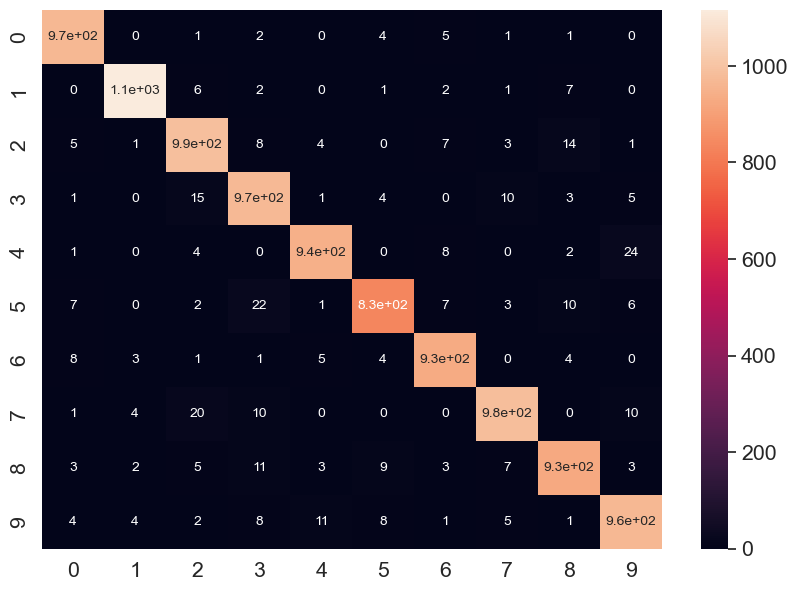

In [13]:
# Membuat visualisasi Confusion Matrix
import pandas as pd
import seaborn as sn # import pustaka seaborn
df_cm = pd.DataFrame(confusion_array, range(10), range(10)) # membuat dataframe pandas dari matriks kebingungan
plt.figure(figsize=(10,7)) # membuat figur yang akan menampung plot heatmap
sn.set(font_scale=1.4) # mengatur skala font
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}) # menggambar plot heatmap 